# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fery Kurniawan
- **Email:** fery.kurniiawan172@gmail.com
- **ID Dicoding:** fery_k

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata feeling temperature tiap musim yang ramai pengguna rental sepeda?
- Secara umum, bagaimana tren waktu yang ramai pengguna rental sepeda?
- Apakah terdapat hubungan antara frekuensi rental sepeda terhadap keadaan musim/cuaca?
- Bagaimana kelompok data jam yang paling banyak pengguna rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

## Data Wrangling

### Gathering Data

##### Proyek ini hanya akan menggunakan data bike sharing yang diagregasi per jam.

-- Membaca file readme.txt yang merupakan deskripsi dari bike sharing data

In [2]:
metadata = open(r'Dataset/Readme.txt', 'r')
print(metadata.read())

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

-- Membaca dan menampilkan file bike sharing data yang diagregasi per jam

In [3]:
df = pd.read_csv(r'Dataset/hour.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Variabel data **categorical** dalam dataset bike sharing sudah melalui proses encode menjadi **numerical**
- Frekuensi pengguna rental sepeda dapat dibedakan menjadi 2 tipe, yaitu **casual** dan **registered**

### Assessing Data

-- Melihat berapakah banyak missing value (NaN) pada setiap kolom

In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

-- Melihat apakah ada unexpected/inconsistent data pada variable categorical

In [5]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
cat_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in cat_cols:
    print(f'{col}: {df[col].unique()}')

season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
hr: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [1 2 3 4]


-- Melakukan decoding label dari numerical menjadi categorical (hanya untuk kebutuhan kejelasan variable)

In [6]:
df['season'] = df['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

df['yr'] = df['yr'].map({
    0: '2011',
    1: '2012'
})

df['mnth'] = df['mnth'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
})

df['hr'] = df['hr'].astype('string')

df['holiday'] = df['holiday'].map({
    0: 'not holiday',
    1: 'holiday'
})

df['weekday'] = df['weekday'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

df['workingday'] = df['workingday'].map({
    0: 'not working day',
    1: 'working day'
})

df['weathersit'] = df['weathersit'].astype('string')

**Insight:**
- Tidak terdapat missing value pada setiap kolom
- Tidak terdapat unexpected/inconsistent data pada data categorical

### Cleaning Data

-- Karena **tidak terdapat missing value** pada data ini, maka **tidak perlu** dilakukan proses **cleaning data**

**Insight:**
- Data sudah bersih dari missing value tanpa melalui proses cleaning data

## Exploratory Data Analysis (EDA)

### Univariate Analysis

##### Statistics Descriptive

-- Menampilkan nilai-nilai statistika deskriptif pada data numerical

In [7]:
df[num_cols].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


-- Menampilkan nilai-nilai statistika deskriptif pada data categorical

In [8]:
df[cat_cols].describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
count,17379,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,2,7,2,4
top,fall,2012,July,16,not holiday,Sunday,working day,1
freq,4496,8734,1488,730,16879,2512,11865,11413


### Multivariate Analysis

##### Data Relationship

-- Akan dicari tau apakah ada perbedaan signifikan banyak pengguna terhadap tiap grup variabel musim dan cuaca  
dengan melalukan uji statistik ANOVA (asumsikan $\alpha = 0.05$)

In [9]:
group_season = [df['cnt'][df['season'] == season] for season in df['season'].unique()]
f_stat_season, p_value_season = f_oneway(*group_season)

print(f'f_stat: {f_stat_season:.3f} \np_value: {p_value_season:.3f}')

f_stat: 409.181 
p_value: 0.000


In [10]:
group_weather = [df['cnt'][df['weathersit'] == weather] for weather in df['weathersit'].unique()]
f_stat_weather, p_value_weather = f_oneway(*group_weather)

print(f'f_stat: {f_stat_weather:.3f} \np_value: {p_value_weather:.3f}')

f_stat: 127.174 
p_value: 0.000


-- Menghitung korelasi antar variabel numerical

In [11]:
df[num_cols].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


**Insight:**
- Data atemp cenderung simetris (mean ≈ median), sedangkan data cnt/casual/registered cenderung right-skewed (mean >> median)
- Rental sepeda paling banyak tercatat per record saat cuaca cerah dan musim fall (belum tentu paling banyak digunakan)
- Berdasarkan uji ANOVA, terdapat perbedaan signifikan oleh musim dan cuaca terhadap banyak pengguna rental sepeda (p-value < 0.05)

## Visualization & Explanatory Analysis

- Secara umum, berapa rata-rata feeling temperature tiap musim yang ramai pengguna rental sepeda?
- Apakah terdapat hubungan antara frekuensi rental sepeda terhadap keadaan musim/cuaca?
- Bagaimana kelompok data hari/jam yang ramai pengguna rental sepeda?

### Pertanyaan 1: Berapa rata-rata feeling temperature tiap musim yang ramai pengguna rental sepeda?

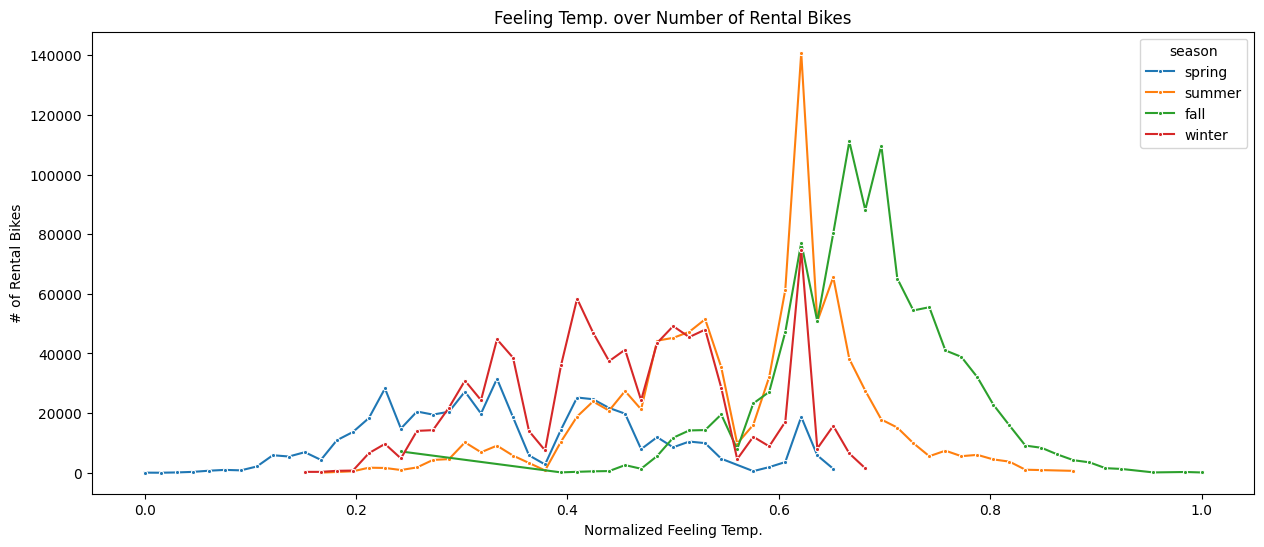

In [12]:
plt.figure(figsize=(15, 6))

df_season = df.groupby(['season', 'atemp']).agg({'cnt': 'sum'}).reset_index()
sns.lineplot(data=df_season, x='atemp', y='cnt', errorbar=None, hue='season', marker='.', hue_order=df['season'].unique())
plt.title('Feeling Temp. over Number of Rental Bikes')
plt.xlabel('Normalized Feeling Temp.')
plt.ylabel('# of Rental Bikes')
plt.show()

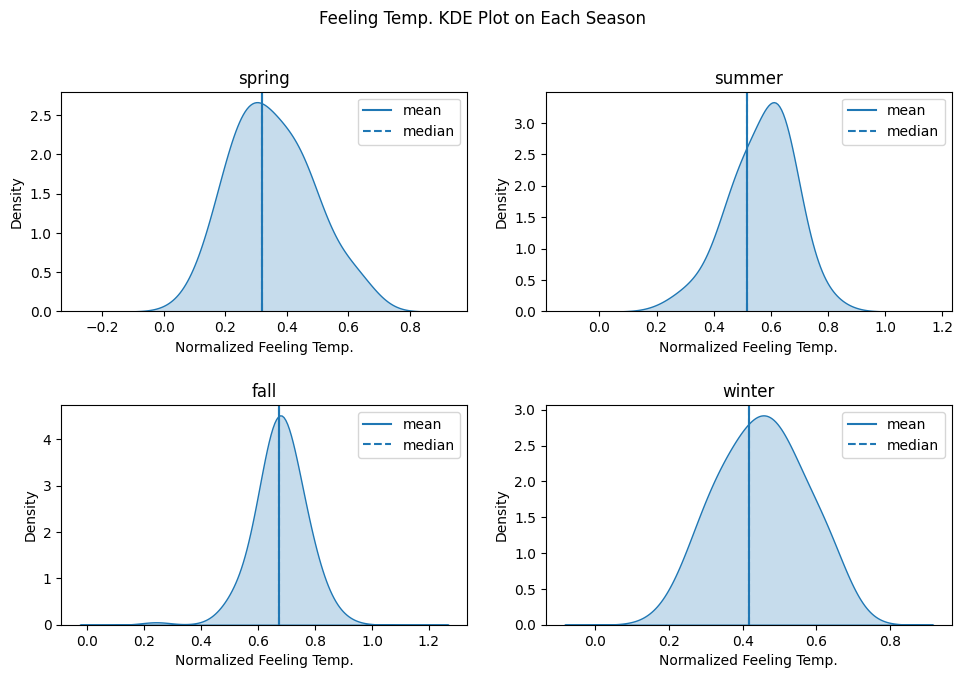

In [13]:
plt.figure(figsize=(10, 7))

for i in range(4):
    plt.subplot(2, 2, i+1)
    season = df['season'].unique()[i]

    data = df[df['season'] == season]
    data = data.groupby('atemp').agg({'cnt': 'sum'}).reset_index()
    sns.kdeplot(data=data, x='atemp', weights='cnt', fill=True)

    plt.axvline(data['atemp'].mean(), linestyle='-', label='mean')
    plt.axvline(data['atemp'].median(), linestyle='--', label='median')
    
    plt.title(f'{season}')
    plt.xlabel('Normalized Feeling Temp.')
    plt.legend()
    
plt.suptitle('Feeling Temp. KDE Plot on Each Season')
plt.tight_layout(pad=2)
plt.show()

### Pertanyaan 2: Secara umum, bagaimana tren waktu yang ramai pengguna rental sepeda?

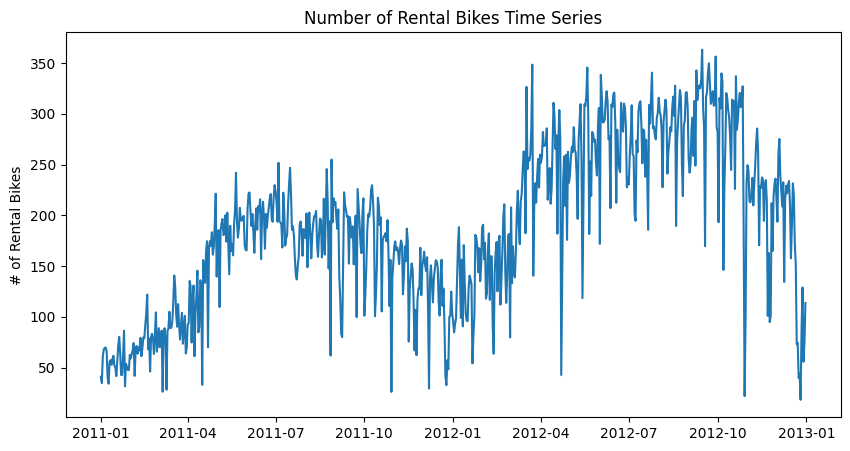

In [14]:
plt.figure(figsize=(10, 5))
df['dteday'] = pd.to_datetime(df['dteday'])
sns.lineplot(data=df, x='dteday', y='cnt', errorbar=None)
plt.title('Number of Rental Bikes Time Series')
plt.xlabel('')
plt.ylabel('# of Rental Bikes')
plt.show()

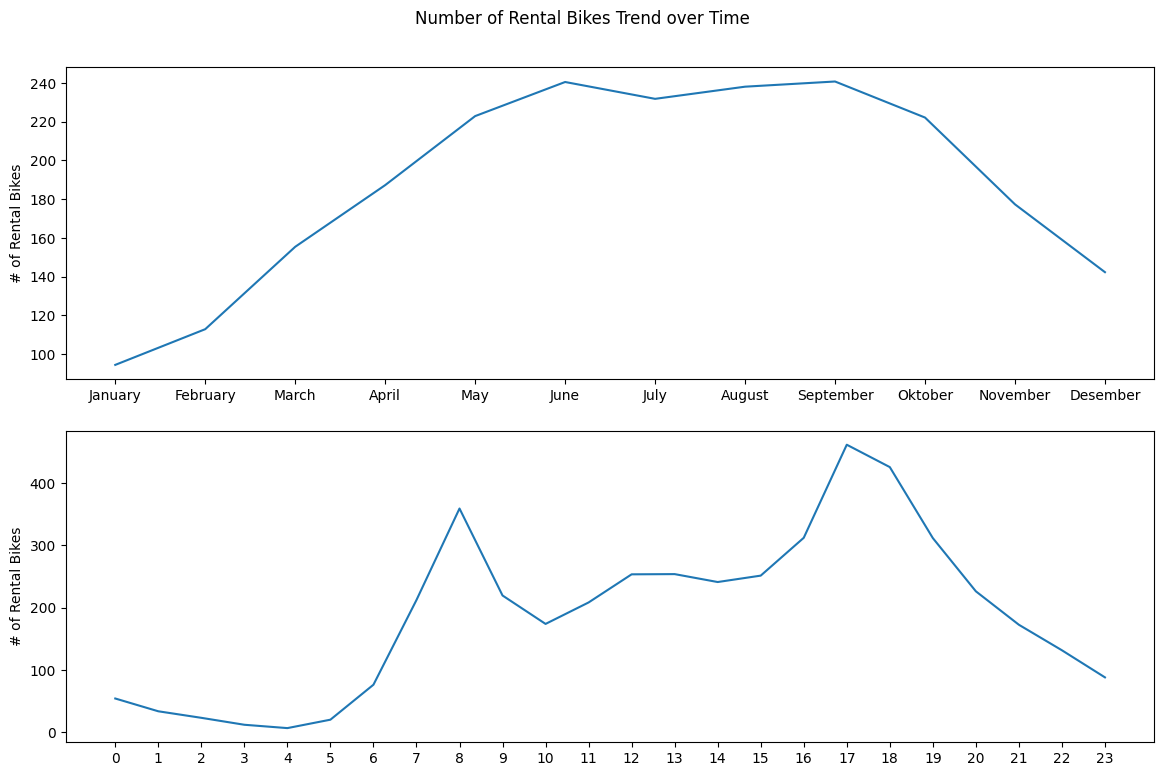

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.lineplot(data=df, x='mnth', y='cnt', errorbar=None)
plt.xlabel('')
plt.ylabel('# of Rental Bikes')

plt.subplot(2, 1, 2)
sns.lineplot(data=df, x='hr', y='cnt', errorbar=None)
plt.xlabel('')
plt.ylabel('# of Rental Bikes')

plt.suptitle('Number of Rental Bikes Trend over Time')
plt.tight_layout(pad=2)
plt.show()

### Pertanyaan 3: Apakah terdapat hubungan antara frekuensi rental sepeda terhadap keadaan musim/cuaca?

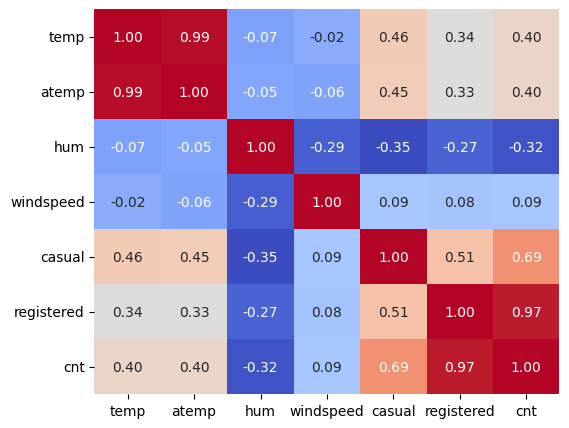

In [16]:
plt.figure(figsize=(6, 5))

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.show()

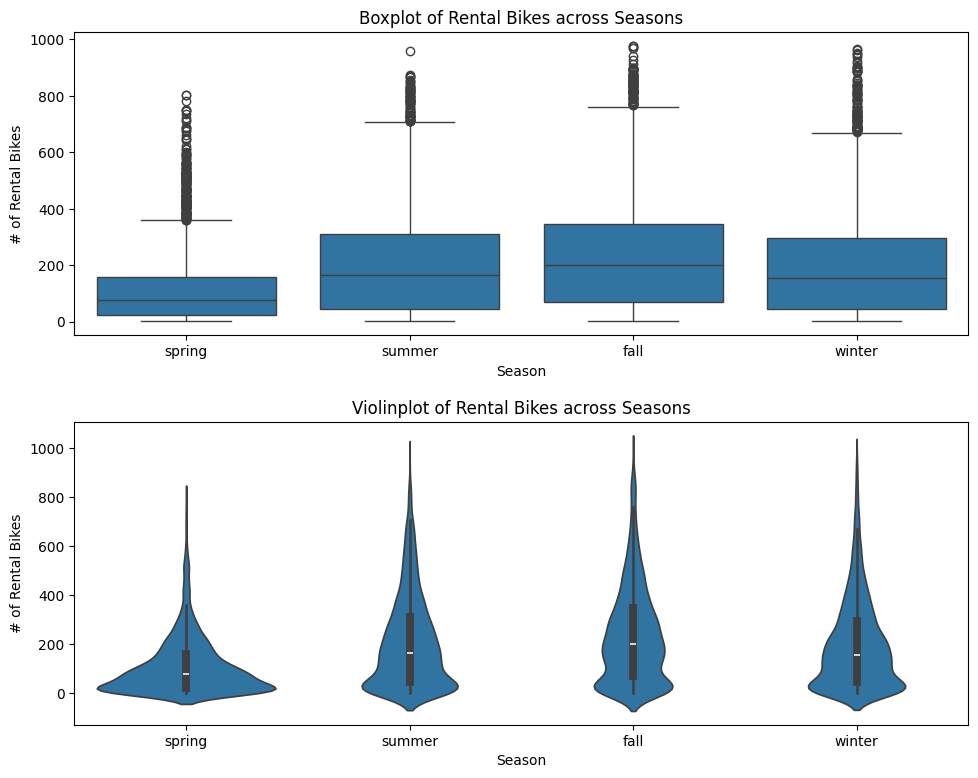

In [17]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='season', y='cnt')
plt.title('Boxplot of Rental Bikes across Seasons')
plt.xlabel('Season')
plt.ylabel('# of Rental Bikes')

plt.subplot(2, 1, 2)
sns.violinplot(data=df, x='season', y='cnt')
plt.title('Violinplot of Rental Bikes across Seasons')
plt.xlabel('Season')
plt.ylabel('# of Rental Bikes')

plt.tight_layout(pad=1.5)
plt.show()

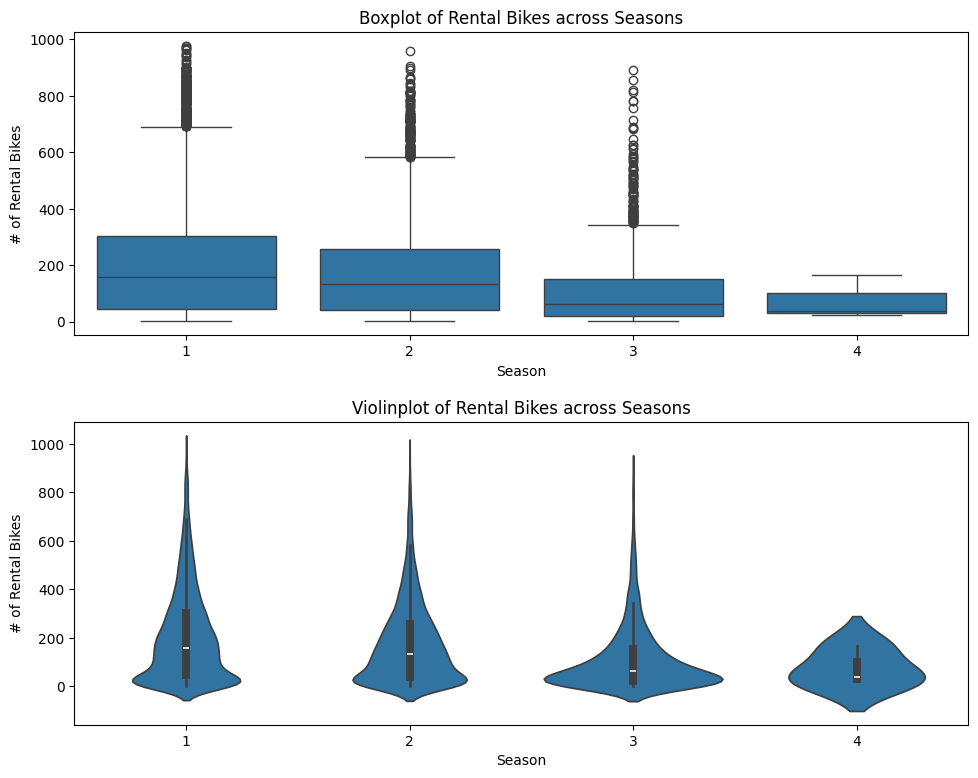

In [18]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='weathersit', y='cnt')
plt.title('Boxplot of Rental Bikes across Seasons')
plt.xlabel('Weather')
plt.ylabel('# of Rental Bikes')

plt.subplot(2, 1, 2)
sns.violinplot(data=df, x='weathersit', y='cnt')
plt.title('Violinplot of Rental Bikes across Seasons')
plt.xlabel('Weather')
plt.ylabel('# of Rental Bikes')

plt.tight_layout(pad=1.5)
plt.show()

**Insight:**
- Feeling temperatur tiap musim cenderung menghampiri berdistribusi simetris.
- Pengguna rental sepeda ramai di beberapa waktu tertentu seperti pada 2012-07, dan pada jam 17.
- Musim spring dan cuaca kategori 3 dan 4 memiliki kecenderungan pengguna rental sepeda yang sedikit dibandingkan dengan lainnya.

## Analisis Lanjutan (Opsional)

### Pertanyaan 4: Bagaimana kelompok data jam yang paling banyak pengguna rental sepeda?

In [33]:
df['hr'] = df['hr'].astype('int')
df['hr_group'] = pd.cut(df['hr'], 
                        bins=[0, 4, 6, 11, 15, 18, 24], 
                        labels=['Midnight', 'Dawn', 'Morning', 'Afternoon', 'Evening', 'Night'],
                        right=False)

df[['hr_group']]

,hr_group
0,Midnight
1,Midnight
2,Midnight
3,Midnight
4,Dawn
...,...
17374,Night
17375,Night
17376,Night
17377,Night


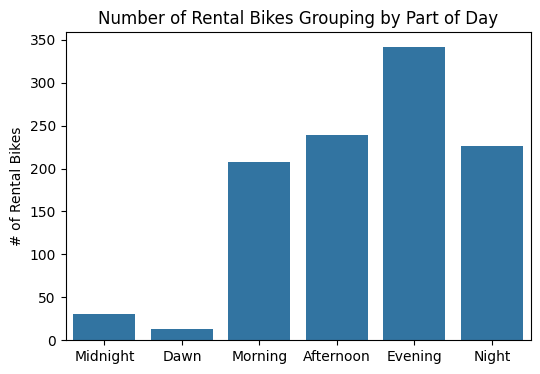

In [30]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='hr_group', y='cnt', errorbar=None)
plt.title('Number of Rental Bikes Grouping by Part of Day')
plt.xlabel('')
plt.ylabel('# of Rental Bikes')
plt.show()

- Berapa rata-rata feeling temperature tiap musim yang ramai pengguna rental sepeda?
- Secara umum, bagaimana tren waktu yang ramai pengguna rental sepeda?
- Apakah terdapat hubungan antara frekuensi rental sepeda terhadap keadaan musim/cuaca?
- Bagaimana kelompok data jam yang paling banyak pengguna rental sepeda?

## Conclusion

1. Rata-rata feeling temp. yang ramai pengguna rental sepeda pada musim spring sekitar 0.3, musim summer sekitar 0.5, musim fall sekitar 0.67, dan musim winter sekitar 0.41.
2. Pengguna rental sepeda semakin banyak pada periode sekitar Mei-Oktober 2012 hingga akhirnya menurun pada November-Desember 2012, dan peak hours pengguna rental sepeda secara rata-rata adalah di pagi jam 7.00 dan sore jam 17.00, yaitu jam pergi dan pulang kerja.
3. Keadaan musim dan cuaca berpengaruh terhadap banyaknya pengguna rental sepeda, hal ini dikuatkan oleh uji ANOVA yang menolak $H_0$.
4. Secara rata-rata, pengguna rental sepeda paling banyak di kelompok waktu sore (di antara jam 15.00 - 18.00).